# House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting.

My goal for this project is to minimize the Root Mean Square Error as much as possible. Ideally, I would like my RSME to be 0.00044 (that is the lowest one, currently) or lower.

## Step 1: Frame the Problem

__Business Objective:__ Using various explanatory features, build a predictive model that will be able to accurately predict the final price of a given home.

The residential homes are located in Ames, Iowa. 

We are given 79 explanatory features.

__Type of Task:__ This is a classic Regression problem.

__Performance Measure:__ We will use the Root Mean Square Error (RSME). This performance measure is most commonly used for Regression tasks. Furthermore, it is the performance measure that we are looking to minimize. We will also be taking a look at accuracy.

## Step 2: Retrieving the Data

You may retrieve the data from the [competition website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description).

__Data Breakdown:__
- data_description.txt: description/information about the data
- sample_submission.csv: what a submission should look like
- test.csv: testing set
- train.csv: training set

In [1]:
# Importing the Basic ML libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
# Retrieving the Data
PATH_NAME= '/Users/jinalshah/Jinal/Github Repos/House-Prices-Challenge-Solution/Data'
raw_train = pd.read_csv(PATH_NAME+'/train.csv')
raw_test = pd.read_csv(PATH_NAME+'/test.csv')
sample_submission = pd.read_csv(PATH_NAME+'/sample_submission.csv')

In [3]:
# Previewing the training data
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are clearly a lot of features! There are 79 total features (not including Id and SalePrice). I don't think all features are necessary, and it will be up to us to determine which features are necessary and which are not.

In [4]:
# Previewing the testing data
raw_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Previewing the Submission Set
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


We need to make sure we include the Id and the Predicted Sale Price in our submission.

## Step 3: Exploratory Data Analysis (EDA)

### Feature Descriptions
Since there are 79 features, I won't explain each one in depth. However, the competition site and the data_description.txt file explain each feature in depth.

Also, for categorical features, we won't be able to go through them all because there may be a lot. So to combat this, we will use the [Tableau Visualization Tool](https://public.tableau.com/s/) and note our insights down here. 

First, lets deal with our numerical features

In [6]:
raw_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We have 36 (Id and Sale Price don't count) numerical features. We can clearly see that feature scaling will be needed. Also, some features may look numerical, but are actually categorical. We will need to seperate those first.

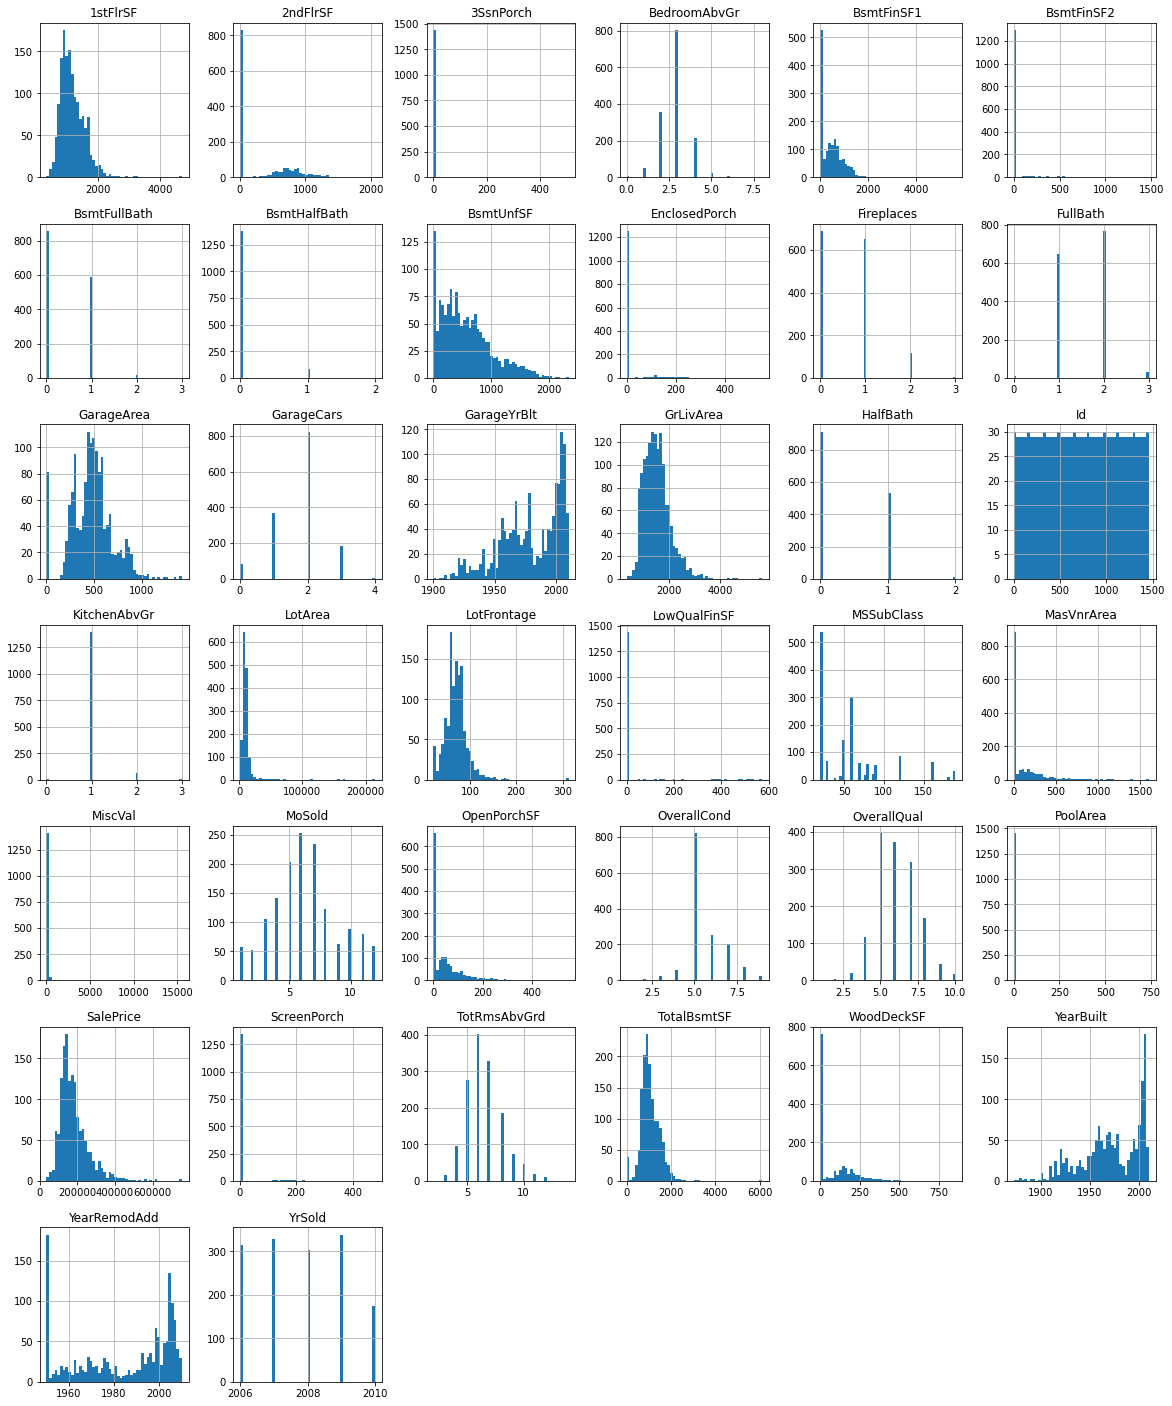

In [8]:
# Plotting Histograms of the data to see which ones are truly numerical and which ones are categorical
raw_train.hist(bins=50,figsize=(20,25))
plt.show()

_Note:_
- Going to have to look some features more closely to determine whether or not they are categorical or true numerical
- Going to have to do some research regarding skewness of features and target label.